In [2]:
import pandas as pd
import numpy as np
import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten # type: ignore
from sklearn.metrics import accuracy_score
from PIL import Image
import ipywidgets as widgets
import io
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X_train  = []
Y_train = []
image_size = 150
labels = ['glioma','meningioma','notumor','pituitary']
for i in labels:
    folderPath = os.path.join("Training",i)
    for j in os.listdir(folderPath):
        img= cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

# join the all train or test imgs for better model
# don't worry in next step we will split 
for i in labels:
    folderPath = os.path.join("Testing",i)
    for j in os.listdir(folderPath):
        img= cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)


X_train = np.array(X_train)
Y_train = np.array(Y_train)



In [5]:
X_train, Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

#output will be like
# total img, size of img, size of ing, RGB value

(7023, 150, 150, 3)

now split the data into train test


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)


In [7]:
# Convert labels to indices
y_train = np.array([labels.index(i) for i in Y_train])  
y_test = np.array([labels.index(i) for i in Y_test])

y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(labels))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(labels))
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")



X_train shape: (6320, 150, 150, 3), X_test shape: (703, 150, 150, 3)
y_train shape: (6320, 4), y_test shape: (703, 4)


In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu',input_shape = (150,150,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation= 'relu'))
model.add(Dense(512,activation= 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
import tensorflow as tf

model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(),  # Explicit optimizer
    metrics=['accuracy']  # Use a list instead of a tuple
)


In [16]:
history = model.fit(X_train,y_train,epochs=5,validation_split=0.1)

Epoch 1/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 721s 4s/step - accuracy: 0.3500 - loss: 1.2940 - val_accuracy: 0.6076 - val_loss: 0.8981
Epoch 2/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 719s 4s/step - accuracy: 0.6816 - loss: 0.7625 - val_accuracy: 0.6978 - val_loss: 0.7217
Epoch 3/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 701s 4s/step - accuracy: 0.7671 - loss: 0.5666 - val_accuracy: 0.7642 - val_loss: 0.5421
Epoch 4/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 708s 4s/step - accuracy: 0.8117 - loss: 0.4683 - val_accuracy: 0.7215 - val_loss: 0.8462
Epoch 5/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 711s 4s/step - accuracy: 0.8364 - loss: 0.4008 - val_accuracy: 0.8639 - val_loss: 0.3628


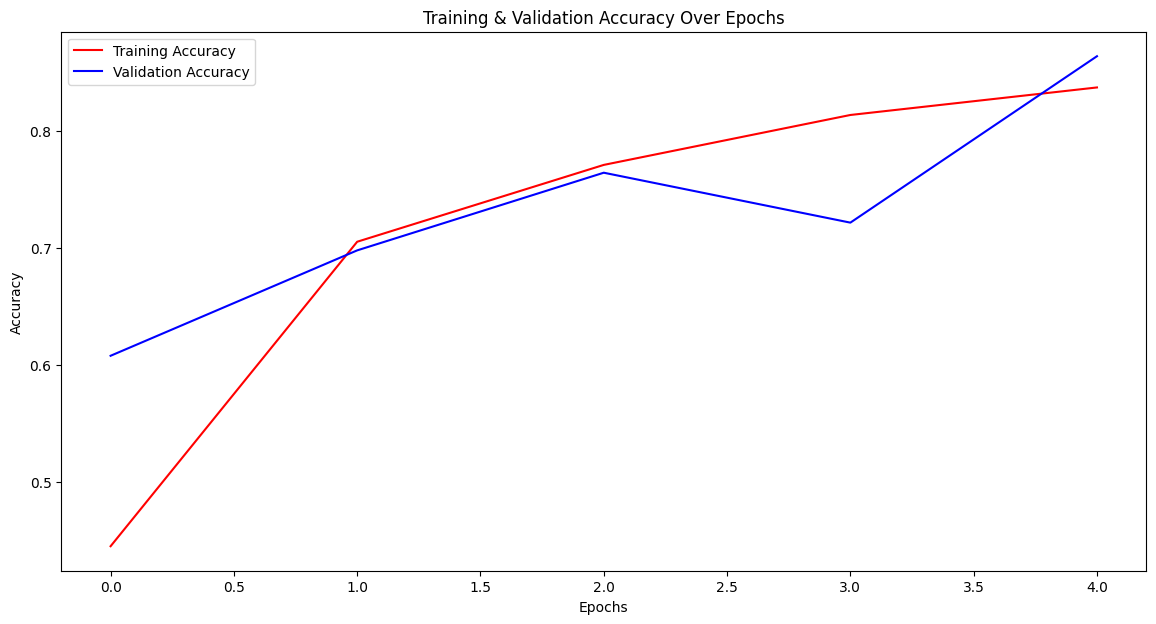

In [21]:
# model.save('brain_tumor_test.h5')
# epochs = range(len(acc))
# acc = history.history['accuracy']
# val_acc = history.history['accuracy']
# fig = plt.figure(figsize=(14,7))
# plt.plot(epochs,acc,'r',label = "Training Accuracy")
# plt.plot(epochs,val_acc,'b',label = 'validation accuray')
# plt.legend(loc='upper left')
# plt.show()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']  # ✅ Corrected key

# Define epochs correctly
epochs = range(len(acc))

# Plot training and validation accuracy
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")  # ✅ Fixed validation accuracy
plt.legend(loc='upper left')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy Over Epochs")
plt.show()

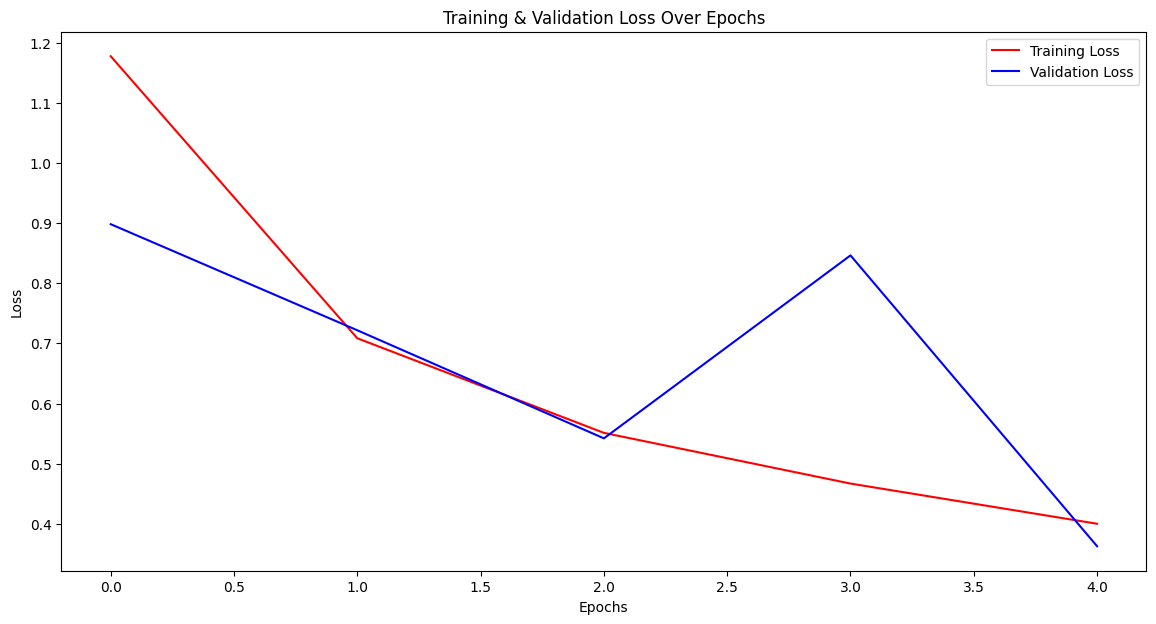

In [22]:
# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(train_loss))

# Plot training & validation loss
plt.figure(figsize=(14,7))
plt.plot(epochs, train_loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Over Epochs")
plt.legend(loc='upper right')
plt.show()

Prediction

<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Admin\AppData\Local\Temp\ipykernel_4360\727225161.py:13: SyntaxWarning: invalid escape sequence '\S'
  img_path = 'F:\SOLUTION_O7\BRAIN_TUMAR_CNN\Training\meningioma\Tr-me_1336.jpg'


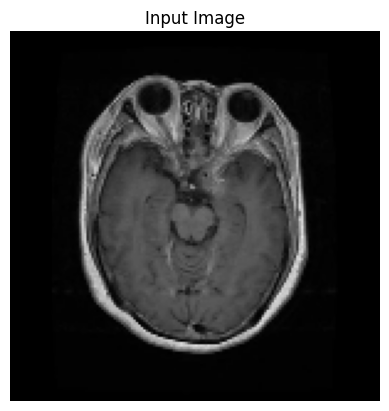

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
Predicted Tumor Type: glioma tumor


In [22]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
# Load the trained model
model = load_model('brain_tumor_test.h5')

# Define class labels
labels = ['glioma tumor', 'meningioma tumor', 'notumor tumor', 'pituitary tumor']

# Load and preprocess the image
img_path = 'F:\SOLUTION_O7\BRAIN_TUMAR_CNN\Training\meningioma\Tr-me_1336.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
img = cv2.resize(img, (150, 150))  # Resize to match model input size
img_array = np.array(img) / 255.0  # Normalize pixel values
img_array = img_array.reshape(1, 150, 150, 3)  # Reshape for model input

# Display the image
plt.imshow(img)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Make prediction
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions)  # Get index of highest probability class
predicted_class = labels[predicted_index]  # Map index to class label

# Print the prediction
print(f"Predicted Tumor Type: {predicted_class}")